# Contents
* Importing Libraries and Data
* Creating Subset
* Creating Visualizations
* Dickey-Fuller Test

# 1 Importing Libraries and Data

In [25]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#importing data
df=pd.read_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_manipulated_titles.csv'))

In [3]:
#viewing dataset to ensure it's a good choice for time series analysis
df.head(2)

Unnamed: 0 Gender Seeking  Age  Pictures  Profile Visits  Kisses  Fans  \
0           0      F       M   25         4            8279     239     0   
1           1      F       M   22         5             663      13     0   

   flirtInterests_chat  flirtInterests_friends  ...  lang_fr lang_en lang_de  \
0                 True                    True  ...    False   False    True   
1                 True                    True  ...     True   False    True   

  lang_it  lang_es  lang_pt  Verified        lastOnlineDate  lastOnlineTime  \
0   False    False    False         0  2015-04-25T20:43:26Z    1.429995e+09   
1    True    False    False         0  2015-04-26T09:19:35Z    1.430040e+09   

                    User ID  
0  55303fc3160ba0eb728b4575  
1  552e7b61c66da10d1e8b4c82  

[2 rows x 33 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Seeking', 'Age', 'Pictures', 'Profile Visits',
       'Kisses', 'Fans', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'Country', 'City', 'Location', 'distance',
       'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew',
       'isOnline', 'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified', 'lastOnlineDate',
       'lastOnlineTime', 'User ID'],
      dtype='object')

# 2 Subseting, wrangling and cleaning data

In [5]:
#resetting index
df=df.reset_index()

In [6]:
df.head(2)

index  Unnamed: 0 Gender Seeking  Age  Pictures  Profile Visits  Kisses  \
0      0           0      F       M   25         4            8279     239   
1      1           1      F       M   22         5             663      13   

   Fans  flirtInterests_chat  ...  lang_fr  lang_en lang_de lang_it lang_es  \
0     0                 True  ...    False    False    True   False   False   
1     0                 True  ...     True    False    True    True   False   

   lang_pt  Verified        lastOnlineDate  lastOnlineTime  \
0    False         0  2015-04-25T20:43:26Z    1.429995e+09   
1    False         0  2015-04-26T09:19:35Z    1.430040e+09   

                    User ID  
0  55303fc3160ba0eb728b4575  
1  552e7b61c66da10d1e8b4c82  

[2 rows x 34 columns]

In [7]:
#creating dataframe without unnecessary columns
df2=df.drop(columns=['Unnamed: 0', 'Gender', 'Seeking', 'Age', 'Pictures', 'Profile Visits',
       'Kisses', 'Fans', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isNew',
       'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified'])

In [8]:
#viewing new dataframe
df2.head(2)

index Country        City Location  distance  isMobile  isOnline  \
0      0      CH  Rothenburg  Rümlang     175.0         1         0   
1      1      CH     Sissach  Sissach     138.0         1         0   

         lastOnlineDate  lastOnlineTime                   User ID  
0  2015-04-25T20:43:26Z    1.429995e+09  55303fc3160ba0eb728b4575  
1  2015-04-26T09:19:35Z    1.430040e+09  552e7b61c66da10d1e8b4c82

In [9]:
#viewing time variables to determine if a range needs to be set
df2['lastOnlineDate'].tolist()

['2015-04-25T20:43:26Z',
 '2015-04-26T09:19:35Z',
 '2015-04-06T14:24:07Z',
 '2015-04-07T11:21:01Z',
 '2015-04-06T14:25:20Z',
 '2015-04-08T14:37:51Z',
 '2015-04-27T19:29:58Z',
 '2015-04-08T14:18:11Z',
 '2015-04-07T20:01:55Z',
 '2015-04-06T16:10:49Z',
 '2015-04-26T11:23:41Z',
 '2015-04-08T14:34:25Z',
 '2015-04-06T14:52:17Z',
 '2015-04-26T10:04:30Z',
 '2015-04-08T14:49:55Z',
 '2015-04-26T17:19:17Z',
 '2015-04-06T14:57:34Z',
 '2015-04-25T04:36:43Z',
 '2015-04-26T10:26:08Z',
 '2015-04-25T18:11:13Z',
 '2015-04-26T08:07:07Z',
 '2015-04-08T15:09:19Z',
 '2015-04-25T21:35:40Z',
 '2015-04-06T18:52:15Z',
 '2015-04-07T20:21:17Z',
 '2015-04-25T13:18:14Z',
 '2015-04-26T11:50:47Z',
 '2015-04-06T11:59:59Z',
 '2015-04-26T08:18:01Z',
 '2015-04-08T15:09:04Z',
 '2015-04-08T10:38:36Z',
 '2015-04-08T15:14:36Z',
 '2015-04-07T20:11:54Z',
 '2015-04-08T14:22:46Z',
 '2015-04-26T11:45:05Z',
 '2015-04-08T10:14:15Z',
 '2015-04-26T10:22:03Z',
 '2015-04-07T21:42:20Z',
 '2015-04-08T15:00:57Z',
 '2015-04-26T01:17:35Z',


#### It seems all values are within the year of 2015 in the month of April, so we will create a subset to only include last Online Date

In [10]:
df2.columns

Index(['index', 'Country', 'City', 'Location', 'distance', 'isMobile',
       'isOnline', 'lastOnlineDate', 'lastOnlineTime', 'User ID'],
      dtype='object')

In [11]:
df3=df2.drop(columns=['index', 'Country', 'City', 'Location', 'distance', 'isMobile',
       'isOnline', 'lastOnlineTime', 'User ID'])

In [12]:
#exporting dataframe to excel in order to edit/clean how date is formatted
df3.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\OnlineDateIndex.csv'))

In [13]:
#importing editted/clean formatted index
df4=pd.read_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\OnlineDateIndex.csv'))

In [14]:
#viewing data
df4.head()

Unnamed: 0        lastOnlineDate
0           0  2015-04-25T20:43:26Z
1           1  2015-04-26T09:19:35Z
2           2  2015-04-06T14:24:07Z
3           3  2015-04-07T11:21:01Z
4           4  2015-04-06T14:25:20Z

In [15]:
# Set the "Date" column as the index

from datetime import datetime

df4['datetime'] = pd.to_datetime(df4['lastOnlineDate'])
df4= df4.set_index('datetime') # Set the datetime as the index of the dataframe.
df4.drop(['lastOnlineDate'], axis=1, inplace=True) # Drop the "Date" column.
df4.head()

Unnamed: 0
datetime                             
2015-04-25 20:43:26+00:00           0
2015-04-26 09:19:35+00:00           1
2015-04-06 14:24:07+00:00           2
2015-04-07 11:21:01+00:00           3
2015-04-06 14:25:20+00:00           4

# 3 Creating Visualizations

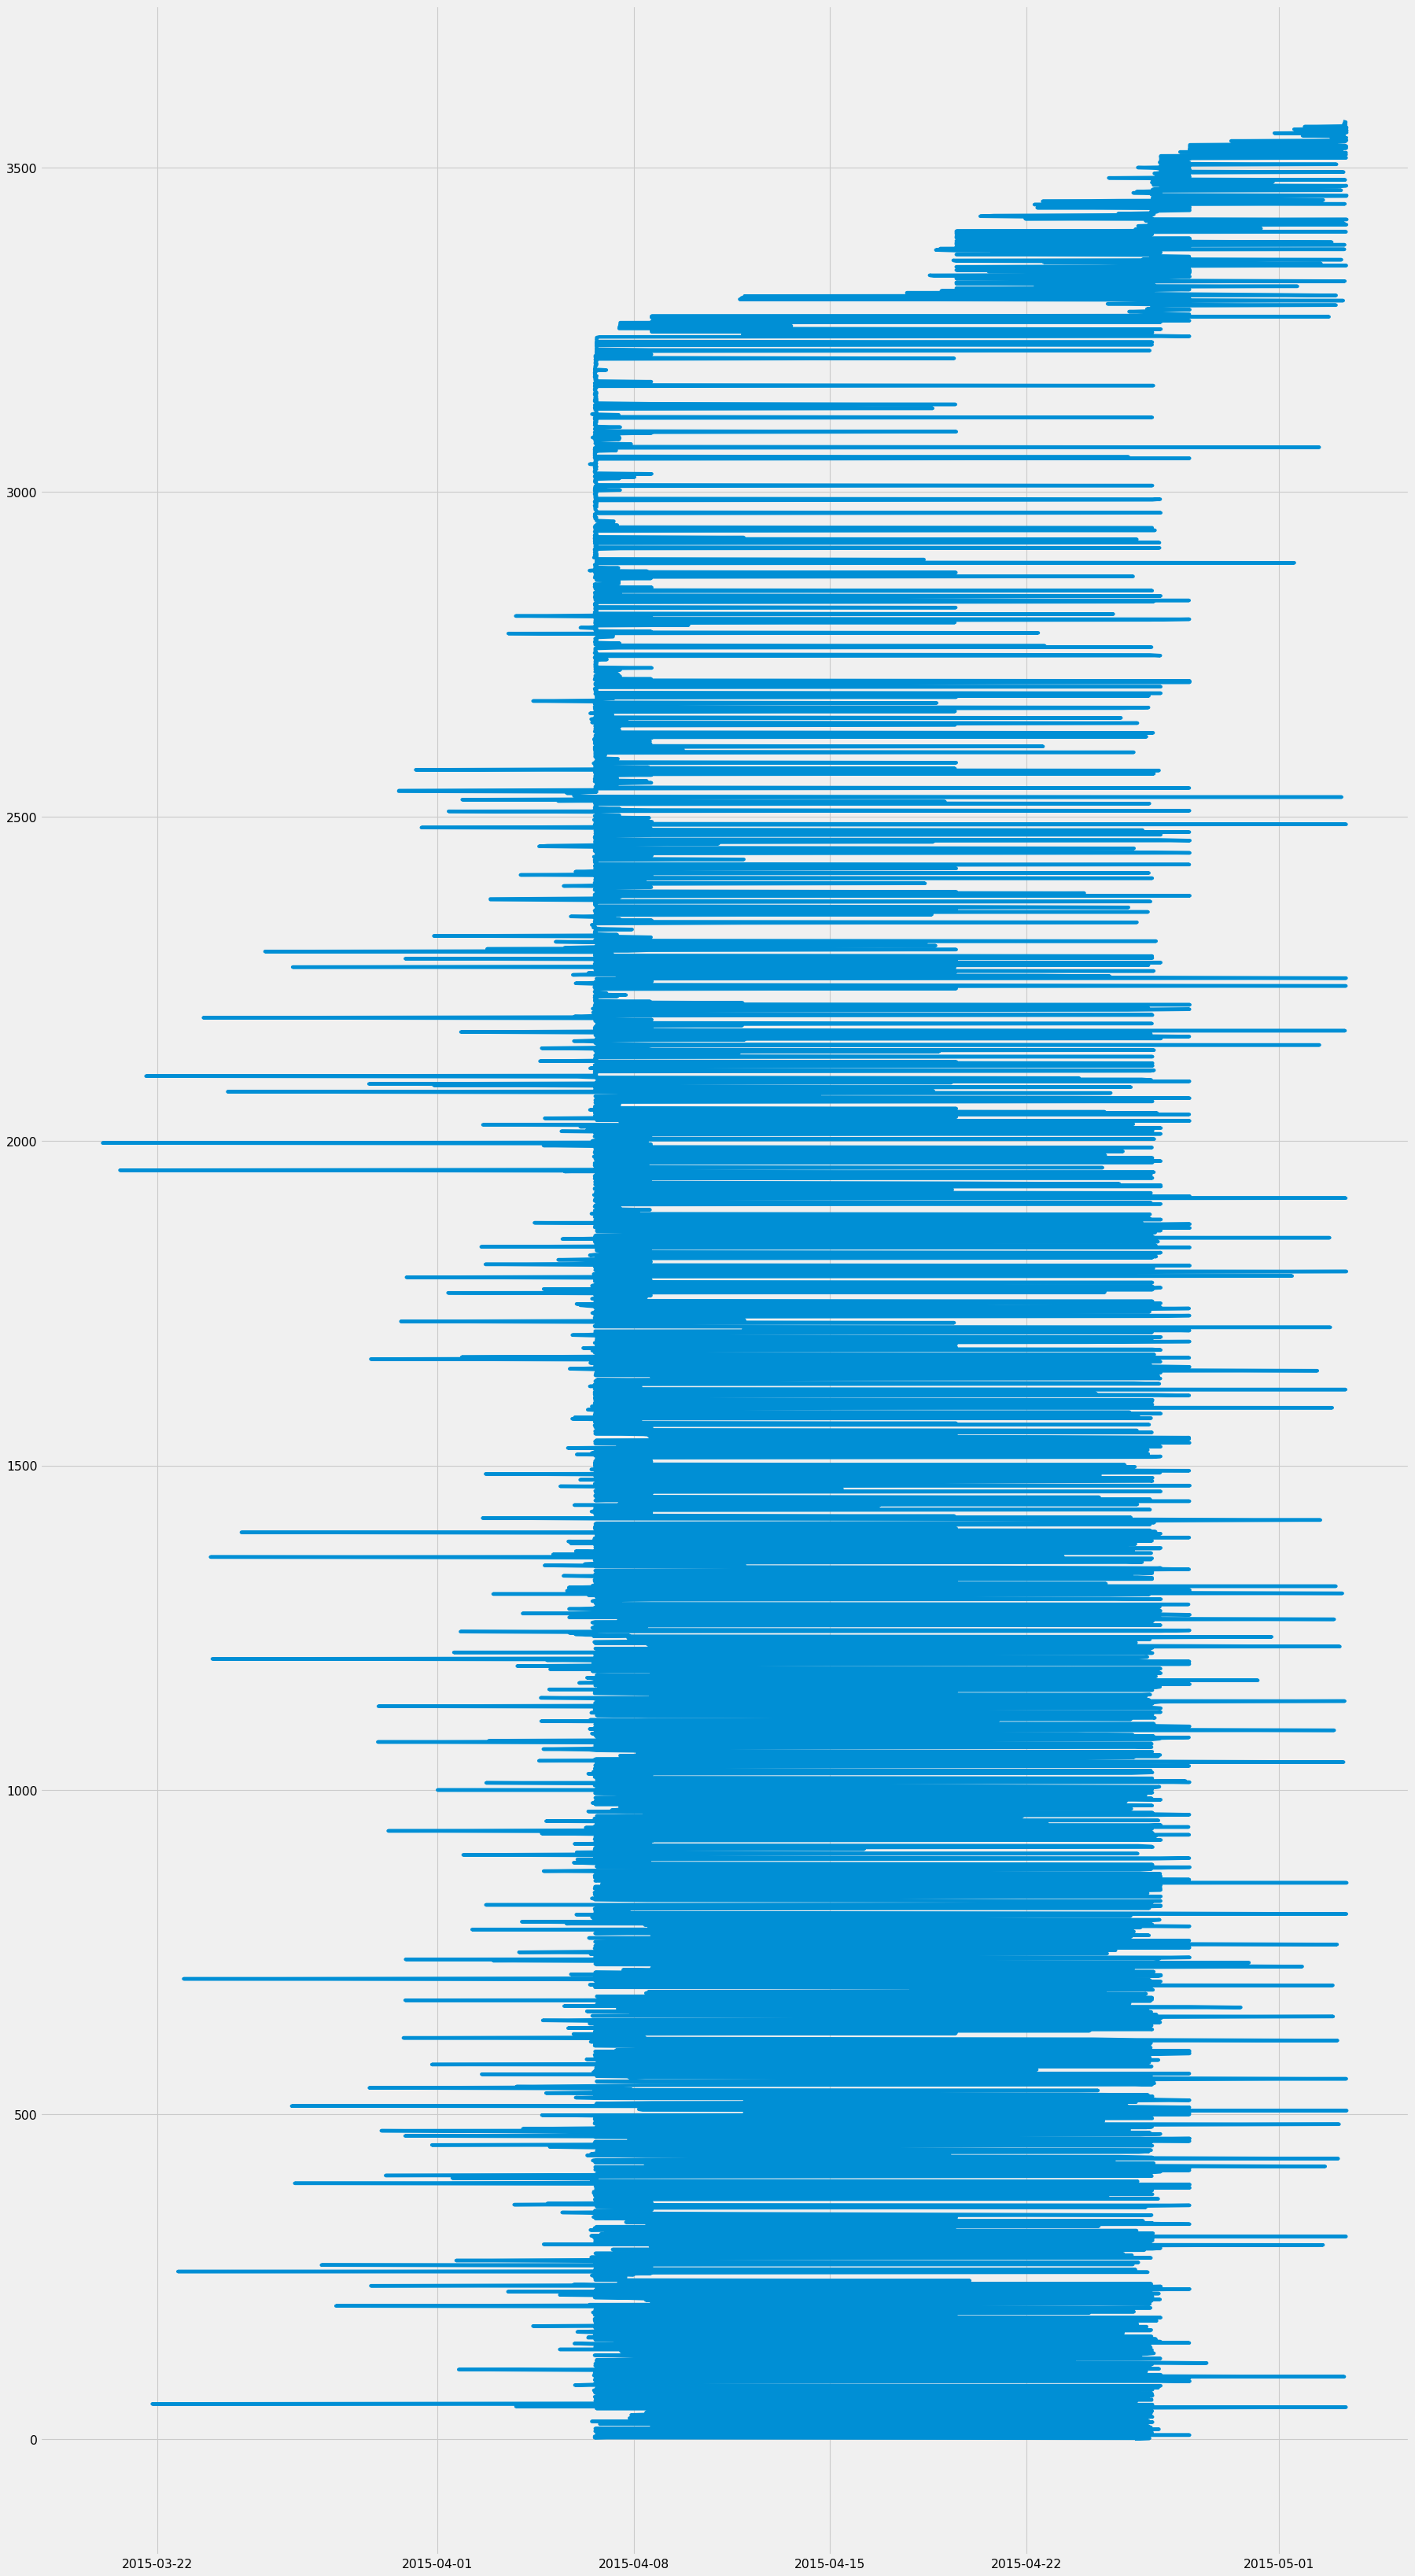

In [22]:
#creating a line chart
timeline= plt.figure(figsize=(25,50),dpi=80)
plt.plot(df4)

#### The type of date time data I have may not be appropriate for a line chart, as the data is just tracking the last time a user was online, another visualizations may be a more suitable visualization to visualize the different times users are online. I will conitnue with the task steps in order to get some insight on how to successfully complete this task.

# 4 Decomposition/Dickey Fuller Test

In [27]:
#decomposing with additive
decomp= sm.tsa.seasonal_decompose(df4, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None